In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm

In [2]:
benchmarks = pd.read_csv('resources/benchmark_scores.csv')

In [3]:
benchmarks[benchmarks['model_name'].isin(['convnext_tiny_imagenet_full_seed-0',
        'resnet-50-robust',
        'resnet50_ecoset_full',
        'convnext_small_imagenet_full_seed-0',
        'convnext_small_imagenet_100_seed-0',
        'convnext_small_imagenet_10_seed-0',
        'resnet152_imagenet_full',
        'resnet101_ecoset_full',
        'resnet50_imagenet_100_seed-0',
        'resnext101_32x32d_wsl',
        'resnet50_tutorial',
        'resnet101_imagenet_full',
        'convnext_large_imagenet_full_seed-0',
        'resnext101_32x48d_wsl',
        'resnet18_imagenet_full',
        'deit_small_imagenet_full_seed-0',
        'resnext101_32x8d_wsl',
        'resnet18_ecoset_full',
        'resnet152_ecoset_full',
        'resnet-152_v2_pytorch',
        'resnet18_imagenet21kP',
        'resnet50_imagenet_full',
        'deit_small_imagenet_100_seed-0',
        ])]

,model_name,average_vision,neural_vision,V1,tong.Coggan2024_fMRI.V1-rdm,FreemanZiemba2013.V1-pls,Marques2020,V1-response_magnitude,Marques2020_FreemanZiemba2013-max_texture,Marques2020_FreemanZiemba2013-max_noise,...,Geirhos2021phasescrambling-top1,Geirhos2021powerequalisation-top1,Geirhos2021rotation-top1,Geirhos2021silhouette-top1,Geirhos2021sketch-top1,Geirhos2021stylized-top1,Geirhos2021uniformnoise-top1,Hermann2020,Hermann2020cueconflict-shape_match,Hermann2020cueconflict-shape_bias
1,resnext101_32x8d_wsl,.429,.337,.323,.018,.271,.682,.875,.876,.805,...,.738,.896,.832,.650,.871,.521,.650,.305,.239,.370
2,convnext_tiny_imagenet_full_seed-0,.409,.386,.344,.147,.198,.686,.898,.865,.904,...,.789,.893,.764,.631,.680,.544,.627,.280,.238,.322
4,convnext_large_imagenet_full_seed-0,.406,.337,.322,.055,.207,.704,.942,.930,.923,...,.817,.938,.795,.631,.760,.556,.704,.317,.265,.368
5,resnext101_32x48d_wsl,.405,.254,.093,.033,.246,X,X,X,X,...,.752,.900,.895,.631,.905,.540,.696,.370,.299,.442
9,convnext_small_imagenet_full_seed-0,.397,.360,.356,.126,.238,.704,.851,.809,.836,...,.809,.934,.799,.600,.756,.557,.669,.298,.255,.340
11,resnet152_imagenet_full,.390,.314,.316,.033,.272,.644,.897,.898,.812,...,.622,.716,.722,.450,.631,.335,.530,.213,.164,.263
12,resnext101_32x32d_wsl,.388,.261,.126,.112,.267,X,X,X,X,...,.769,.911,.864,.644,.911,.546,.701,.337,.267,.408
15,deit_small_imagenet_full_seed-0,.383,.360,.326,.187,.240,.552,.694,.709,.687,...,.778,.868,.772,.544,.656,.512,.689,.260,.206,.313
19,resnet50_tutorial,.369,.310,.355,.013,.278,.776,.939,.946,.904,...,.620,.732,.684,.544,.596,.371,.445,.178,.141,.214
26,resnet101_imagenet_full,.344,.321,.317,.017,.277,.657,.867,.888,.778,...,.622,.757,.701,.487,.609,.331,.476,.200,.152,.249


In [4]:
benchmarks_main = benchmarks[benchmarks['model_name'].isin(['convnext_tiny_imagenet_full_seed-0',
        'resnet-50-robust',
        'resnet50_ecoset_full',
        'convnext_small_imagenet_full_seed-0',
        'convnext_small_imagenet_100_seed-0',
        'convnext_small_imagenet_10_seed-0',
        'resnet152_imagenet_full',
        'resnet101_ecoset_full',
        'resnet50_imagenet_100_seed-0',
        'resnext101_32x32d_wsl',
        'resnet50_tutorial',
        'resnet101_imagenet_full',
        'convnext_large_imagenet_full_seed-0',
        'resnext101_32x48d_wsl',
        'resnet18_imagenet_full',
        'deit_small_imagenet_full_seed-0',
        'resnext101_32x8d_wsl',
        'resnet18_ecoset_full',
        'resnet152_ecoset_full',
        'resnet-152_v2_pytorch',
        'resnet34_ecoset_full',
        'resnet18_imagenet21kP',
        'resnet50_imagenet_full',
        'deit_small_imagenet_100_seed-0',
        'deit_large_imagenet_full_seed-0',
        'convnext_base_imagenet_full_seed-0'                              
  ])]

first_alexnet_row = benchmarks[benchmarks['model_name'] == 'alexnet'].head(1)

benchmarks_main = pd.concat([benchmarks_main, first_alexnet_row], ignore_index=True)

In [5]:
benchmarks_main

,model_name,average_vision,neural_vision,V1,tong.Coggan2024_fMRI.V1-rdm,FreemanZiemba2013.V1-pls,Marques2020,V1-response_magnitude,Marques2020_FreemanZiemba2013-max_texture,Marques2020_FreemanZiemba2013-max_noise,...,Geirhos2021phasescrambling-top1,Geirhos2021powerequalisation-top1,Geirhos2021rotation-top1,Geirhos2021silhouette-top1,Geirhos2021sketch-top1,Geirhos2021stylized-top1,Geirhos2021uniformnoise-top1,Hermann2020,Hermann2020cueconflict-shape_match,Hermann2020cueconflict-shape_bias
0,resnext101_32x8d_wsl,.429,.337,.323,.018,.271,.682,.875,.876,.805,...,.738,.896,.832,.650,.871,.521,.650,.305,.239,.370
1,convnext_tiny_imagenet_full_seed-0,.409,.386,.344,.147,.198,.686,.898,.865,.904,...,.789,.893,.764,.631,.680,.544,.627,.280,.238,.322
2,deit_large_imagenet_full_seed-0,.407,.353,.351,.123,.236,.694,.759,.666,.674,...,.880,.943,.829,.600,.728,.571,.796,.325,.265,.385
3,convnext_large_imagenet_full_seed-0,.406,.337,.322,.055,.207,.704,.942,.930,.923,...,.817,.938,.795,.631,.760,.556,.704,.317,.265,.368
4,resnext101_32x48d_wsl,.405,.254,.093,.033,.246,X,X,X,X,...,.752,.900,.895,.631,.905,.540,.696,.370,.299,.442
5,convnext_base_imagenet_full_seed-0,.400,.350,.394,.277,.210,.695,.928,.845,.979,...,.822,.934,.796,.613,.767,.546,.701,.284,.249,.318
6,convnext_small_imagenet_full_seed-0,.397,.360,.356,.126,.238,.704,.851,.809,.836,...,.809,.934,.799,.600,.756,.557,.669,.298,.255,.340
7,resnet152_imagenet_full,.390,.314,.316,.033,.272,.644,.897,.898,.812,...,.622,.716,.722,.450,.631,.335,.530,.213,.164,.263
8,resnext101_32x32d_wsl,.388,.261,.126,.112,.267,X,X,X,X,...,.769,.911,.864,.644,.911,.546,.701,.337,.267,.408
9,deit_small_imagenet_full_seed-0,.383,.360,.326,.187,.240,.552,.694,.709,.687,...,.778,.868,.772,.544,.656,.512,.689,.260,.206,.313


In [6]:
data = {
    'model_name': [
        'convnext_tiny_imagenet_full_seed-0',
        'resnet-50-robust',
        'resnet50_ecoset_full',
        'convnext_small_imagenet_full_seed-0',
        'convnext_small_imagenet_100_seed-0',
        'convnext_small_imagenet_10_seed-0',
        'resnet152_imagenet_full',
        'resnet101_ecoset_full',
        'resnet50_imagenet_100_seed-0',
        'resnext101_32x32d_wsl',
        'resnet50_tutorial',
        'resnet101_imagenet_full',
        'convnext_large_imagenet_full_seed-0',
        'resnext101_32x48d_wsl',
        'resnet18_imagenet_full',
        'deit_small_imagenet_full_seed-0',
        'resnext101_32x8d_wsl',
        'resnet18_ecoset_full',
        'resnet152_ecoset_full',
        'resnet-152_v2_pytorch',
        'resnet34_ecoset_full',
        'resnet18_imagenet21kP',
        'resnet50_imagenet_full',
        'deit_small_imagenet_100_seed-0',
        'alexnet',
        'deit_large_imagenet_full_seed-0',
        'convnext_base_imagenet_full_seed-0'
    ],
    'V1_ED': [232.8988672046779, 7.304588074212252, 3.9852323952153723, 41.766389085756806, 38.01176199399299, 16.27112640476428, 5.13484979362579, 4.7066355, 2.3581975, 3.8694265, 20.225496, 4.6050205, 12.396329990127308, 12.746991571584314, 5.8272085, 1.31913310587679, 10.594265, 2.4578867, 4.549673, 1119.4642, 6.190399, 9.4045105, 3.1232812, 51.55744966476475, 6.87711486324899, 5.8070374, 63.165413],
    'V2_ED': [91.01576093001957, 62.647966276457616, 80.37155645435179, 159.40542510778835, 107.17741220382737, 20.855715485713542, 46.79651407894524, 59.498028, 16.782818, 27.125761, 20.225496, 27.485935, 125.36047985276362, 28.439618393355804, 23.383835, 3.3469844740263963, 28.354008, 13.063384, 32.90249, 468.88376, 13.74813, 9.4045105, 10.00843, 30.372334999242028, 91.87940269082488, 188.46207, 173.13283],
    'V4_ED': [58.94852384725842, 7.304588074212252, 16.37101506357045, 50.38182217432129, 28.904303932374685, 5.050157102972094, 52.41344568334473, 52.743256, 15.552019, 10.195482, 20.225496, 54.40499, 53.963647215557074, 10.307758180535279, 20.85347, 7.858313528025812, 9.990288, 20.444511, 50.3693, 468.88376, 16.61575, 9.4045105, 14.955217, 34.90225392939544, 91.87940269082488, 15.723594, 63.726006],
    'IT_ED': [91.01576093001957, 62.647966276457616, 491.1131179006356, 87.70991792220683, 69.49061810259244, 18.501102974286816, 44.707980969656056, 544.6881, 226.91763, 33.601643, 121.971085, 367.32083, 205.40470878975916, 58.74875549231471, 25.436272, 113.80570209942657, 26.941193, 25.95187, 566.58777, 45.270477, 74.45847, 128.60641, 513.72974, 84.41328099031021, 98.00357672777004, 362.21817, 63.165413],
    'category': ['Convnext', 'Resnet', 'Resnet', 'Convnext', 'Convnext', 'Convnext', 'Resnet', 'Resnet', 'Resnet', 'Resnext', 'Resnet', 'Resnet', 'Convnext', 'Resnext', 'Resnet', 'Deit', 'Resnext', 'Resnet', 'Resnet', 'Resnet', 'Resnet', 'Resnet', 'Resnet', 'Deit', 'Alexnet', 'Deit', 'Convnext']
}
ed_data = pd.DataFrame(data)

In [7]:
ed_data

,model_name,V1_ED,V2_ED,V4_ED,IT_ED,category
0,convnext_tiny_imagenet_full_seed-0,232.898867,91.015761,58.948524,91.015761,Convnext
1,resnet-50-robust,7.304588,62.647966,7.304588,62.647966,Resnet
2,resnet50_ecoset_full,3.985232,80.371556,16.371015,491.113118,Resnet
3,convnext_small_imagenet_full_seed-0,41.766389,159.405425,50.381822,87.709918,Convnext
4,convnext_small_imagenet_100_seed-0,38.011762,107.177412,28.904304,69.490618,Convnext
5,convnext_small_imagenet_10_seed-0,16.271126,20.855715,5.050157,18.501103,Convnext
6,resnet152_imagenet_full,5.134850,46.796514,52.413446,44.707981,Resnet
7,resnet101_ecoset_full,4.706635,59.498028,52.743256,544.688100,Resnet
8,resnet50_imagenet_100_seed-0,2.358198,16.782818,15.552019,226.917630,Resnet
9,resnext101_32x32d_wsl,3.869426,27.125761,10.195482,33.601643,Resnext


In [8]:
benchmark_ed = pd.merge(benchmarks_main, ed_data, on='model_name', how='inner')
benchmark_ed['avg_ED'] = benchmark_ed[['V1_ED', 'V2_ED', 'V4_ED', 'IT_ED']].mean(axis=1)

In [9]:
# Map of colors for each category
category_colors = {
    'Deit': 'red',
    'Resnext': 'blue',
    'Convnext': 'green',
    'Resnet': 'orange',
    'Alexnet': 'purple'
}

#new column for color mapping
benchmark_ed['color'] = benchmark_ed['category'].map(category_colors)

In [10]:
benchmark_ed

,model_name,average_vision,neural_vision,V1,tong.Coggan2024_fMRI.V1-rdm,FreemanZiemba2013.V1-pls,Marques2020,V1-response_magnitude,Marques2020_FreemanZiemba2013-max_texture,Marques2020_FreemanZiemba2013-max_noise,...,Hermann2020,Hermann2020cueconflict-shape_match,Hermann2020cueconflict-shape_bias,V1_ED,V2_ED,V4_ED,IT_ED,category,avg_ED,color
0,resnext101_32x8d_wsl,.429,.337,.323,.018,.271,.682,.875,.876,.805,...,.305,.239,.370,10.594265,28.354008,9.990288,26.941193,Resnext,18.969938,blue
1,convnext_tiny_imagenet_full_seed-0,.409,.386,.344,.147,.198,.686,.898,.865,.904,...,.280,.238,.322,232.898867,91.015761,58.948524,91.015761,Convnext,118.469728,green
2,deit_large_imagenet_full_seed-0,.407,.353,.351,.123,.236,.694,.759,.666,.674,...,.325,.265,.385,5.807037,188.462070,15.723594,362.218170,Deit,143.052718,red
3,convnext_large_imagenet_full_seed-0,.406,.337,.322,.055,.207,.704,.942,.930,.923,...,.317,.265,.368,12.396330,125.360480,53.963647,205.404709,Convnext,99.281291,green
4,resnext101_32x48d_wsl,.405,.254,.093,.033,.246,X,X,X,X,...,.370,.299,.442,12.746992,28.439618,10.307758,58.748755,Resnext,27.560781,blue
5,convnext_base_imagenet_full_seed-0,.400,.350,.394,.277,.210,.695,.928,.845,.979,...,.284,.249,.318,63.165413,173.132830,63.726006,63.165413,Convnext,90.797415,green
6,convnext_small_imagenet_full_seed-0,.397,.360,.356,.126,.238,.704,.851,.809,.836,...,.298,.255,.340,41.766389,159.405425,50.381822,87.709918,Convnext,84.815889,green
7,resnet152_imagenet_full,.390,.314,.316,.033,.272,.644,.897,.898,.812,...,.213,.164,.263,5.134850,46.796514,52.413446,44.707981,Resnet,37.263198,orange
8,resnext101_32x32d_wsl,.388,.261,.126,.112,.267,X,X,X,X,...,.337,.267,.408,3.869426,27.125761,10.195482,33.601643,Resnext,18.698078,blue
9,deit_small_imagenet_full_seed-0,.383,.360,.326,.187,.240,.552,.694,.709,.687,...,.260,.206,.313,1.319133,3.346984,7.858314,113.805702,Deit,31.582533,red


/var/folders/dr/39wj8h3n0kd5ffnjl22bj0340000gn/T/ipykernel_46333/4056060157.py:4: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.scatterplot(


Text(0, 0.5, 'Score alignment')

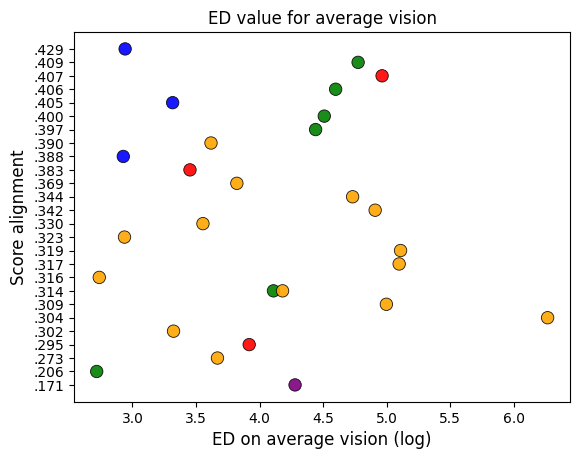

In [11]:
benchmark_ed_sorted = benchmark_ed.sort_values(by='average_vision')
benchmark_ed_sorted['log_ED'] = np.log(benchmark_ed_sorted['avg_ED'])

sns.scatterplot(
    data=benchmark_ed_sorted,
    y='average_vision',
    x='log_ED',
    hue='color',  # Use the 'Color' column for colors
    palette=benchmark_ed_sorted['color'].unique(),  # Ensure correct colors
    s=80, edgecolor='black', linewidth=0.6, alpha=0.9, legend=False  # Aesthetic adjustments
)

plt.gca().invert_yaxis()

plt.title("ED value for average vision")
plt.xlabel("ED on average vision (log)", fontsize=12)
plt.ylabel("Score alignment", fontsize=12)

                            OLS Regression Results                            
Dep. Variable:         average_vision   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.039
Method:                 Least Squares   F-statistic:                   0.02107
Date:                Thu, 19 Dec 2024   Prob (F-statistic):              0.886
Time:                        15:43:49   Log-Likelihood:                 37.262
No. Observations:                  27   AIC:                            -70.52
Df Residuals:                      25   BIC:                            -67.93
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3311      0.058      5.704      0.0

/var/folders/dr/39wj8h3n0kd5ffnjl22bj0340000gn/T/ipykernel_46333/511861518.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_line = model.params[0] + model.params[1] * x_line  # y = intercept + slope * x
/var/folders/dr/39wj8h3n0kd5ffnjl22bj0340000gn/T/ipykernel_46333/511861518.py:33: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.scatterplot(
/var/folders/dr/39wj8h3n0kd5ffnjl22bj0340000gn/T/ipykernel_46333/511861518.py:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(x_line, y_line, color='red', linestyle=

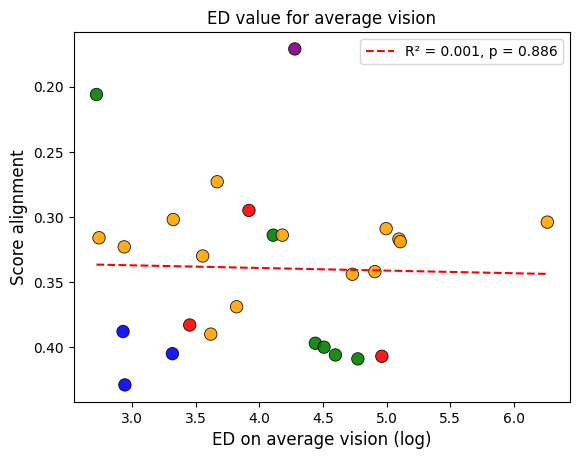

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pandas as pd
import numpy as np

# Sort the data
benchmark_ed_sorted = benchmark_ed.sort_values(by='average_vision')

# Compute log_ED and ensure numeric values
benchmark_ed_sorted['log_ED'] = pd.to_numeric(np.log(benchmark_ed_sorted['avg_ED']), errors='coerce')
benchmark_ed_sorted['average_vision'] = pd.to_numeric(benchmark_ed_sorted['average_vision'], errors='coerce')

# Drop rows with NaN values
valid_data = benchmark_ed_sorted.dropna(subset=['log_ED', 'average_vision'])

# Prepare the data for statsmodels
x = valid_data['log_ED']
y = valid_data['average_vision']
X = sm.add_constant(x)  # Add constant for intercept

# Perform linear regression
model = sm.OLS(y, X).fit()

# Print regression results for debugging
print(model.summary())

# Predict y values for the regression line
x_line = np.linspace(x.min(), x.max(), 100)  # Create smooth x values
y_line = model.params[0] + model.params[1] * x_line  # y = intercept + slope * x

# Plot the scatterplot
sns.scatterplot(
    data=valid_data,
    x='log_ED',
    y='average_vision',
    hue='color',
    palette=valid_data['color'].unique(),
    s=80, edgecolor='black', linewidth=0.6, alpha=0.9, legend=False
)

# Plot the regression line
plt.plot(x_line, y_line, color='red', linestyle='--', label=f'R² = {model.rsquared:.3f}, p = {model.pvalues[1]:.3g}')

# Invert y-axis
plt.gca().invert_yaxis()

# Customize the plot
plt.title("ED value for average vision")
plt.xlabel("ED on average vision (log)", fontsize=12)
plt.ylabel("Score alignment", fontsize=12)

# Add legend
plt.legend(loc='upper right')

# Show the plot
plt.show()


                            OLS Regression Results                            
Dep. Variable:          neural_vision   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.023
Method:                 Least Squares   F-statistic:                    0.4162
Date:                Thu, 19 Dec 2024   Prob (F-statistic):              0.525
Time:                        15:43:49   Log-Likelihood:                 49.409
No. Observations:                  27   AIC:                            -94.82
Df Residuals:                      25   BIC:                            -92.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2926      0.037      7.905      0.0

/var/folders/dr/39wj8h3n0kd5ffnjl22bj0340000gn/T/ipykernel_46333/37469075.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_line = model.params[0] + model.params[1] * x_line  # y = intercept + slope * x
/var/folders/dr/39wj8h3n0kd5ffnjl22bj0340000gn/T/ipykernel_46333/37469075.py:33: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.scatterplot(
/var/folders/dr/39wj8h3n0kd5ffnjl22bj0340000gn/T/ipykernel_46333/37469075.py:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(x_line, y_line, color='red', linestyle='--

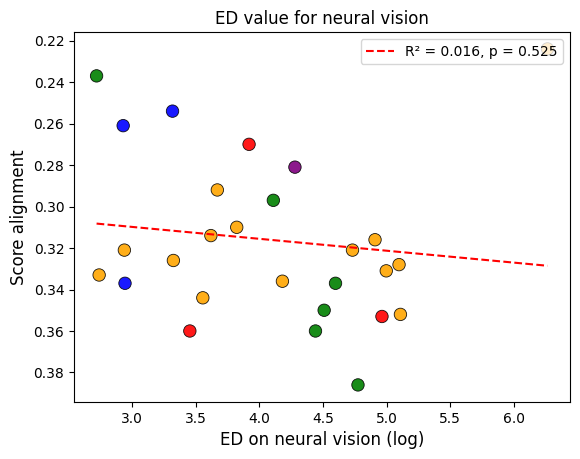

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pandas as pd
import numpy as np

# Sort the data
benchmark_ed_sorted = benchmark_ed.sort_values(by='neural_vision')

# Compute log_ED and ensure numeric values
benchmark_ed_sorted['log_ED'] = pd.to_numeric(np.log(benchmark_ed_sorted['avg_ED']), errors='coerce')
benchmark_ed_sorted['neural_vision'] = pd.to_numeric(benchmark_ed_sorted['neural_vision'], errors='coerce')

# Drop rows with NaN values
valid_data = benchmark_ed_sorted.dropna(subset=['log_ED', 'neural_vision'])

# Prepare the data for statsmodels
x = valid_data['log_ED']
y = valid_data['neural_vision']
X = sm.add_constant(x)  # Add constant for intercept

# Perform linear regression
model = sm.OLS(y, X).fit()

# Print regression results for debugging
print(model.summary())

# Predict y values for the regression line
x_line = np.linspace(x.min(), x.max(), 100)  # Create smooth x values
y_line = model.params[0] + model.params[1] * x_line  # y = intercept + slope * x

# Plot the scatterplot
sns.scatterplot(
    data=valid_data,
    x='log_ED',
    y='neural_vision',
    hue='color',
    palette=valid_data['color'].unique(),
    s=80, edgecolor='black', linewidth=0.6, alpha=0.9, legend=False
)

# Plot the regression line
plt.plot(x_line, y_line, color='red', linestyle='--', label=f'R² = {model.rsquared:.3f}, p = {model.pvalues[1]:.3g}')

# Invert y-axis
plt.gca().invert_yaxis()

# Customize the plot
plt.title("ED value for neural vision")
plt.xlabel("ED on neural vision (log)", fontsize=12)
plt.ylabel("Score alignment", fontsize=12)

# Add legend
plt.legend(loc='upper right')

# Show the plot
plt.show()

/var/folders/dr/39wj8h3n0kd5ffnjl22bj0340000gn/T/ipykernel_46333/636488050.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope, intercept = model.params[1], model.params[0]
/var/folders/dr/39wj8h3n0kd5ffnjl22bj0340000gn/T/ipykernel_46333/636488050.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = model.pvalues[1]
/var/folders/dr/39wj8h3n0kd5ffnjl22bj0340000gn/T/ipykernel_46333/636488050.py:38: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.scatterplot(
/var/folders/dr/39wj8h3n0kd5ffnjl22bj0340000gn/T/i

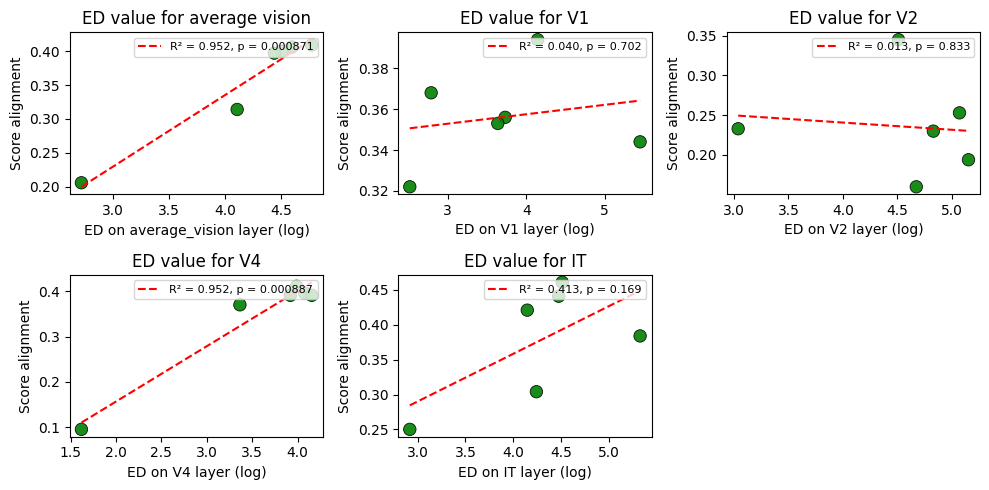

In [14]:
layers = ['average_vision', 'V1', 'V2', 'V4', 'IT']
ed_columns = ['avg_ED', 'V1_ED', 'V2_ED', 'V4_ED', 'IT_ED']
titles = ['ED value for average vision', 'ED value for V1', 
          'ED value for V2', 'ED value for V4', 'ED value for IT']

# Filter data for 'Convnext' in the 'category' column
convnext_data = benchmark_ed[benchmark_ed['category'].str.contains('Convnext', na=False)]

fig, axes = plt.subplots(2, 3, figsize=(10, 5))  # 2 rows, 3 columns
axes = axes.flatten()  

for i, (layer, ed_col, title) in enumerate(zip(layers, ed_columns, titles)):
    # Sort and compute log_ED
    benchmark_ed_sorted = convnext_data.copy()
    benchmark_ed_sorted[f'log_{layer}_ED'] = pd.to_numeric(
        np.log(benchmark_ed_sorted[ed_col]), errors='coerce'
    )
    benchmark_ed_sorted[layer] = pd.to_numeric(
        benchmark_ed_sorted[layer], errors='coerce'
    )

    valid_data = benchmark_ed_sorted.dropna(subset=[f'log_{layer}_ED', layer])

    # Extract x and y for regression
    x = valid_data[f'log_{layer}_ED']
    y = valid_data[layer]
    X = sm.add_constant(x)  # Add constant for intercept
    
    # Linear regression
    model = sm.OLS(y, X).fit()
    slope, intercept = model.params[1], model.params[0]
    r_squared = model.rsquared
    p_value = model.pvalues[1]
    
    x_line = np.linspace(x.min(), x.max(), 100)
    y_line = slope * x_line + intercept
    
    sns.scatterplot(
        data=valid_data,
        y=layer,
        x=f'log_{layer}_ED',
        hue='color',
        palette=valid_data['color'].unique(),
        s=80, edgecolor='black', linewidth=0.6, alpha=0.9, legend=False,
        ax=axes[i]
    )
    
    axes[i].plot(x_line, y_line, color='red', linestyle='--', 
                 label=f'R² = {r_squared:.3f}, p = {p_value:.3g}')
    
    axes[i].set_title(title, fontsize=12)  # Smaller title font size
    axes[i].set_xlabel(f"ED on {layer} layer (log)", fontsize=10)  # Smaller x-label font size
    axes[i].set_ylabel("Score alignment", fontsize=10)  # Smaller y-label font size
    axes[i].legend(loc='upper right', fontsize=8)  # Smaller legend font size

fig.delaxes(axes[-1])  # Remove extra subplot if not used

plt.tight_layout()
plt.show()


/var/folders/dr/39wj8h3n0kd5ffnjl22bj0340000gn/T/ipykernel_46333/3394113651.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope, intercept = model.params[1], model.params[0]
/var/folders/dr/39wj8h3n0kd5ffnjl22bj0340000gn/T/ipykernel_46333/3394113651.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = model.pvalues[1]
/var/folders/dr/39wj8h3n0kd5ffnjl22bj0340000gn/T/ipykernel_46333/3394113651.py:38: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.scatterplot(
/var/folders/dr/39wj8h3n0kd5ffnjl22bj0340000gn/

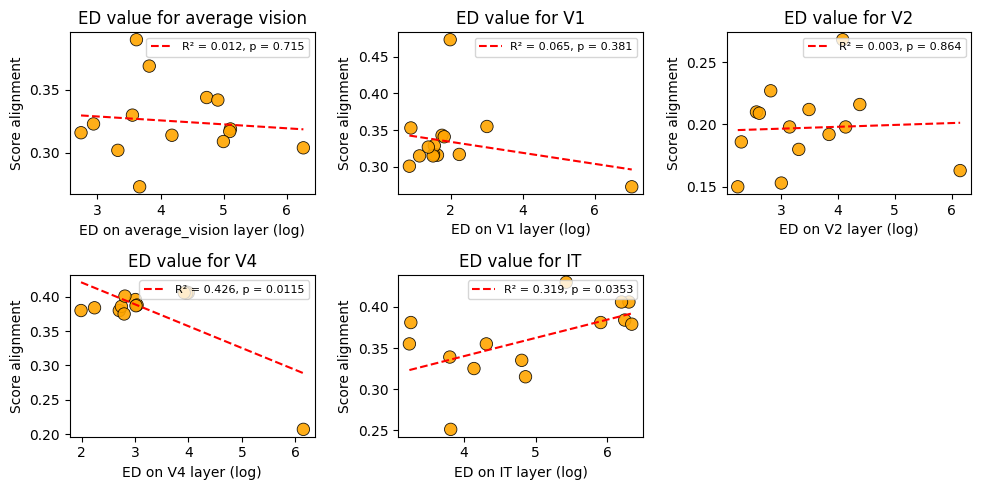

In [15]:
layers = ['average_vision', 'V1', 'V2', 'V4', 'IT']
ed_columns = ['avg_ED', 'V1_ED', 'V2_ED', 'V4_ED', 'IT_ED']
titles = ['ED value for average vision', 'ED value for V1', 
          'ED value for V2', 'ED value for V4', 'ED value for IT']

# Filter data for 'Convnext' in the 'category' column
convnext_data = benchmark_ed[benchmark_ed['category'].str.contains('Resnet', na=False)]

fig, axes = plt.subplots(2, 3, figsize=(10, 5))  # 2 rows, 3 columns
axes = axes.flatten()  

for i, (layer, ed_col, title) in enumerate(zip(layers, ed_columns, titles)):
    # Sort and compute log_ED
    benchmark_ed_sorted = convnext_data.copy()
    benchmark_ed_sorted[f'log_{layer}_ED'] = pd.to_numeric(
        np.log(benchmark_ed_sorted[ed_col]), errors='coerce'
    )
    benchmark_ed_sorted[layer] = pd.to_numeric(
        benchmark_ed_sorted[layer], errors='coerce'
    )

    valid_data = benchmark_ed_sorted.dropna(subset=[f'log_{layer}_ED', layer])

    # Extract x and y for regression
    x = valid_data[f'log_{layer}_ED']
    y = valid_data[layer]
    X = sm.add_constant(x)  # Add constant for intercept
    
    # Linear regression
    model = sm.OLS(y, X).fit()
    slope, intercept = model.params[1], model.params[0]
    r_squared = model.rsquared
    p_value = model.pvalues[1]
    
    x_line = np.linspace(x.min(), x.max(), 100)
    y_line = slope * x_line + intercept
    
    sns.scatterplot(
        data=valid_data,
        y=layer,
        x=f'log_{layer}_ED',
        hue='color',
        palette=valid_data['color'].unique(),
        s=80, edgecolor='black', linewidth=0.6, alpha=0.9, legend=False,
        ax=axes[i]
    )
    
    axes[i].plot(x_line, y_line, color='red', linestyle='--', 
                 label=f'R² = {r_squared:.3f}, p = {p_value:.3g}')
    
    axes[i].set_title(title, fontsize=12)  # Smaller title font size
    axes[i].set_xlabel(f"ED on {layer} layer (log)", fontsize=10)  # Smaller x-label font size
    axes[i].set_ylabel("Score alignment", fontsize=10)  # Smaller y-label font size
    axes[i].legend(loc='upper right', fontsize=8)  # Smaller legend font size

fig.delaxes(axes[-1])  # Remove extra subplot if not used

plt.tight_layout()
plt.show()

/var/folders/dr/39wj8h3n0kd5ffnjl22bj0340000gn/T/ipykernel_46333/2712096545.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope, intercept = model.params[1], model.params[0]
/var/folders/dr/39wj8h3n0kd5ffnjl22bj0340000gn/T/ipykernel_46333/2712096545.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = model.pvalues[1]
/var/folders/dr/39wj8h3n0kd5ffnjl22bj0340000gn/T/ipykernel_46333/2712096545.py:38: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.scatterplot(
/var/folders/dr/39wj8h3n0kd5ffnjl22bj0340000gn/

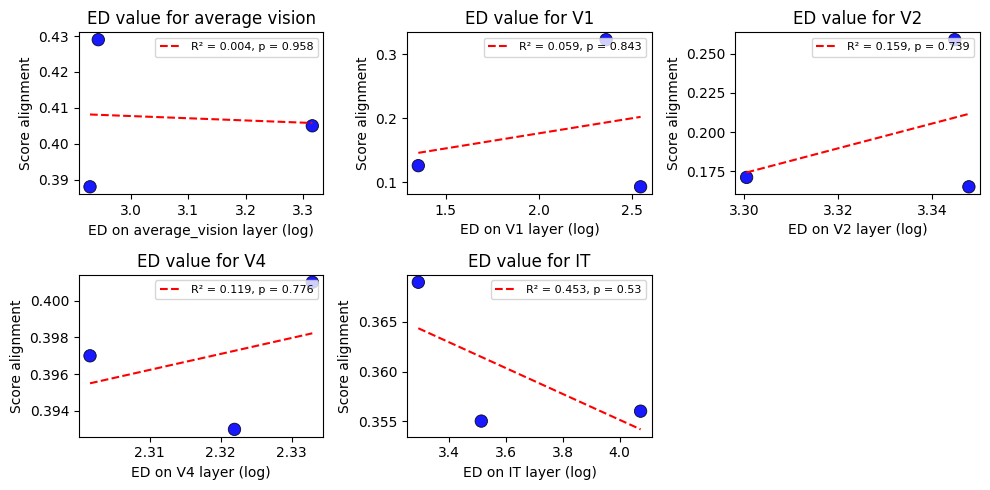

In [16]:
layers = ['average_vision', 'V1', 'V2', 'V4', 'IT']
ed_columns = ['avg_ED', 'V1_ED', 'V2_ED', 'V4_ED', 'IT_ED']
titles = ['ED value for average vision', 'ED value for V1', 
          'ED value for V2', 'ED value for V4', 'ED value for IT']

# Filter data for 'Convnext' in the 'category' column
convnext_data = benchmark_ed[benchmark_ed['category'].str.contains('Resnext', na=False)]

fig, axes = plt.subplots(2, 3, figsize=(10, 5))  # 2 rows, 3 columns
axes = axes.flatten()  

for i, (layer, ed_col, title) in enumerate(zip(layers, ed_columns, titles)):
    # Sort and compute log_ED
    benchmark_ed_sorted = convnext_data.copy()
    benchmark_ed_sorted[f'log_{layer}_ED'] = pd.to_numeric(
        np.log(benchmark_ed_sorted[ed_col]), errors='coerce'
    )
    benchmark_ed_sorted[layer] = pd.to_numeric(
        benchmark_ed_sorted[layer], errors='coerce'
    )

    valid_data = benchmark_ed_sorted.dropna(subset=[f'log_{layer}_ED', layer])

    # Extract x and y for regression
    x = valid_data[f'log_{layer}_ED']
    y = valid_data[layer]
    X = sm.add_constant(x)  # Add constant for intercept
    
    # Linear regression
    model = sm.OLS(y, X).fit()
    slope, intercept = model.params[1], model.params[0]
    r_squared = model.rsquared
    p_value = model.pvalues[1]
    
    x_line = np.linspace(x.min(), x.max(), 100)
    y_line = slope * x_line + intercept
    
    sns.scatterplot(
        data=valid_data,
        y=layer,
        x=f'log_{layer}_ED',
        hue='color',
        palette=valid_data['color'].unique(),
        s=80, edgecolor='black', linewidth=0.6, alpha=0.9, legend=False,
        ax=axes[i]
    )
    
    axes[i].plot(x_line, y_line, color='red', linestyle='--', 
                 label=f'R² = {r_squared:.3f}, p = {p_value:.3g}')
    
    axes[i].set_title(title, fontsize=12)  # Smaller title font size
    axes[i].set_xlabel(f"ED on {layer} layer (log)", fontsize=10)  # Smaller x-label font size
    axes[i].set_ylabel("Score alignment", fontsize=10)  # Smaller y-label font size
    axes[i].legend(loc='upper right', fontsize=8)  # Smaller legend font size

fig.delaxes(axes[-1])  # Remove extra subplot if not used

plt.tight_layout()
plt.show()


/var/folders/dr/39wj8h3n0kd5ffnjl22bj0340000gn/T/ipykernel_46333/2088669787.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope, intercept = model.params[1], model.params[0]
/var/folders/dr/39wj8h3n0kd5ffnjl22bj0340000gn/T/ipykernel_46333/2088669787.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = model.pvalues[1]
/var/folders/dr/39wj8h3n0kd5ffnjl22bj0340000gn/T/ipykernel_46333/2088669787.py:38: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.scatterplot(
/var/folders/dr/39wj8h3n0kd5ffnjl22bj0340000gn/

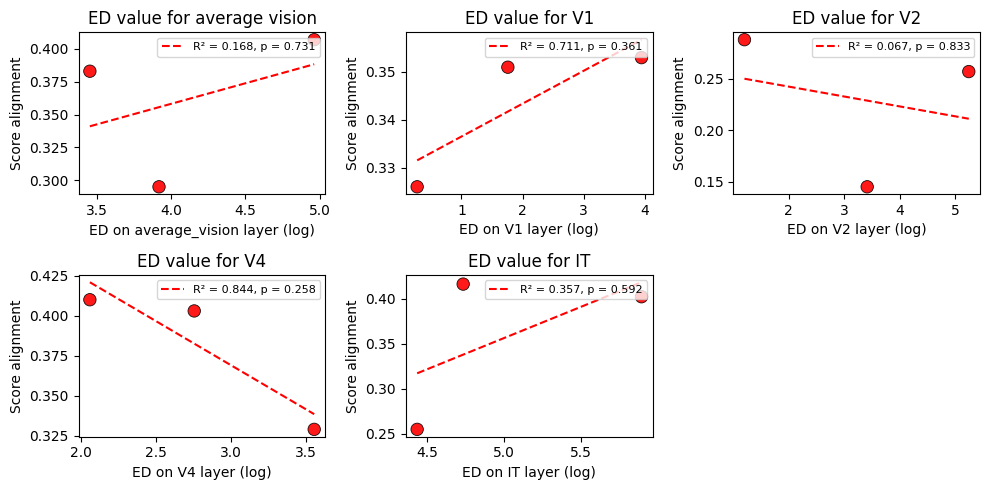

In [17]:
layers = ['average_vision', 'V1', 'V2', 'V4', 'IT']
ed_columns = ['avg_ED', 'V1_ED', 'V2_ED', 'V4_ED', 'IT_ED']
titles = ['ED value for average vision', 'ED value for V1', 
          'ED value for V2', 'ED value for V4', 'ED value for IT']

# Filter data for 'Convnext' in the 'category' column
convnext_data = benchmark_ed[benchmark_ed['category'].str.contains('Deit', na=False)]

fig, axes = plt.subplots(2, 3, figsize=(10, 5))  # 2 rows, 3 columns
axes = axes.flatten()  

for i, (layer, ed_col, title) in enumerate(zip(layers, ed_columns, titles)):
    # Sort and compute log_ED
    benchmark_ed_sorted = convnext_data.copy()
    benchmark_ed_sorted[f'log_{layer}_ED'] = pd.to_numeric(
        np.log(benchmark_ed_sorted[ed_col]), errors='coerce'
    )
    benchmark_ed_sorted[layer] = pd.to_numeric(
        benchmark_ed_sorted[layer], errors='coerce'
    )

    valid_data = benchmark_ed_sorted.dropna(subset=[f'log_{layer}_ED', layer])

    # Extract x and y for regression
    x = valid_data[f'log_{layer}_ED']
    y = valid_data[layer]
    X = sm.add_constant(x)  # Add constant for intercept
    
    # Linear regression
    model = sm.OLS(y, X).fit()
    slope, intercept = model.params[1], model.params[0]
    r_squared = model.rsquared
    p_value = model.pvalues[1]
    
    x_line = np.linspace(x.min(), x.max(), 100)
    y_line = slope * x_line + intercept
    
    sns.scatterplot(
        data=valid_data,
        y=layer,
        x=f'log_{layer}_ED',
        hue='color',
        palette=valid_data['color'].unique(),
        s=80, edgecolor='black', linewidth=0.6, alpha=0.9, legend=False,
        ax=axes[i]
    )
    
    axes[i].plot(x_line, y_line, color='red', linestyle='--', 
                 label=f'R² = {r_squared:.3f}, p = {p_value:.3g}')
    
    axes[i].set_title(title, fontsize=12)  # Smaller title font size
    axes[i].set_xlabel(f"ED on {layer} layer (log)", fontsize=10)  # Smaller x-label font size
    axes[i].set_ylabel("Score alignment", fontsize=10)  # Smaller y-label font size
    axes[i].legend(loc='upper right', fontsize=8)  # Smaller legend font size

fig.delaxes(axes[-1])  # Remove extra subplot if not used

plt.tight_layout()
plt.show()

/var/folders/dr/39wj8h3n0kd5ffnjl22bj0340000gn/T/ipykernel_46333/2740980345.py:5: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.scatterplot(


Text(0, 0.5, 'Score alignment')

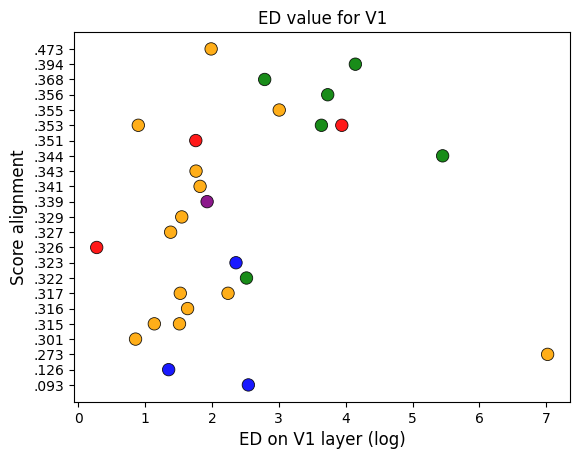

In [18]:
benchmark_ed_sorted = benchmark_ed.sort_values(by='V1')
benchmark_ed_sorted['log_V1_ED'] = np.log(benchmark_ed_sorted['V1_ED'])


sns.scatterplot(
    data=benchmark_ed_sorted,
    y='V1',
    x='log_V1_ED',
    hue='color',  # Use the 'Color' column for colors
    palette=benchmark_ed_sorted['color'].unique(),  # Ensure correct colors
    s=80, edgecolor='black', linewidth=0.6, alpha=0.9, legend=False
)

plt.gca().invert_yaxis()

plt.title("ED value for V1")
plt.xlabel("ED on V1 layer (log)", fontsize=12)
plt.ylabel("Score alignment", fontsize=12)


/var/folders/dr/39wj8h3n0kd5ffnjl22bj0340000gn/T/ipykernel_46333/4155045600.py:4: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.scatterplot(


Text(0, 0.5, 'Score alignment')

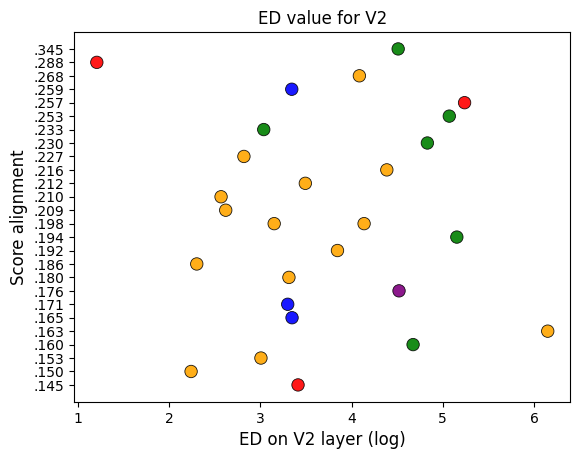

In [19]:
benchmark_ed_sorted = benchmark_ed.sort_values(by='V2')
benchmark_ed_sorted['log_V2_ED'] = np.log(benchmark_ed_sorted['V2_ED'])

sns.scatterplot(
    data=benchmark_ed_sorted,
    y='V2',
    x='log_V2_ED',
    hue='color',  # Use the 'Color' column for colors
    palette=benchmark_ed_sorted['color'].unique(),  # Ensure correct colors
    s=80, edgecolor='black', linewidth=0.6, alpha=0.9, legend=False
)

plt.gca().invert_yaxis()

plt.title("ED value for V2")
plt.xlabel("ED on V2 layer (log)", fontsize=12)
plt.ylabel("Score alignment", fontsize=12)

/var/folders/dr/39wj8h3n0kd5ffnjl22bj0340000gn/T/ipykernel_46333/1854428343.py:4: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.scatterplot(


Text(0, 0.5, 'Score alignment')

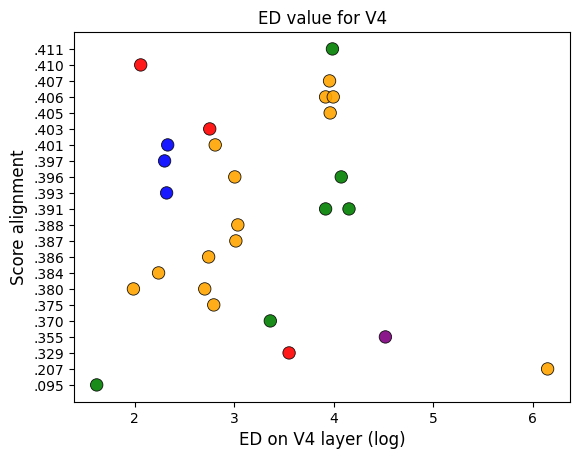

In [20]:
benchmark_ed_sorted = benchmark_ed.sort_values(by='V4')
benchmark_ed_sorted['log_V4_ED'] = np.log(benchmark_ed_sorted['V4_ED'])

sns.scatterplot(
    data=benchmark_ed_sorted,
    y='V4',
    x='log_V4_ED',
    hue='color',  # Use the 'Color' column for colors
    palette=benchmark_ed_sorted['color'].unique(),  # Ensure correct colors
    s=80, edgecolor='black', linewidth=0.6, alpha=0.9, legend=False 
)

plt.gca().invert_yaxis()

plt.title("ED value for V4")
plt.xlabel("ED on V4 layer (log)", fontsize=12)
plt.ylabel("Score alignment", fontsize=12)

/var/folders/dr/39wj8h3n0kd5ffnjl22bj0340000gn/T/ipykernel_46333/3836379147.py:4: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.scatterplot(


Text(0, 0.5, 'Score alignment')

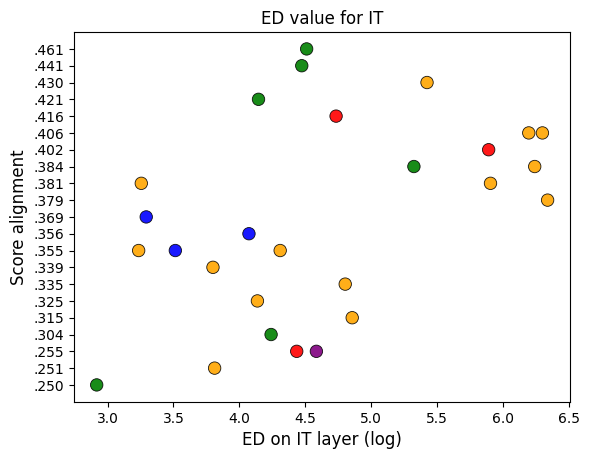

In [21]:
benchmark_ed_sorted = benchmark_ed.sort_values(by='IT')
benchmark_ed_sorted['log_IT_ED'] = np.log(benchmark_ed_sorted['IT_ED'])

sns.scatterplot(
    data=benchmark_ed_sorted,
    y='IT',
    x='log_IT_ED',
    hue='color',  # Use the 'Color' column for colors
    palette=benchmark_ed_sorted['color'].unique(),  # Ensure correct colors
    s=80, edgecolor='black', linewidth=0.6, alpha=0.9, legend=False 
)

plt.gca().invert_yaxis()

plt.title("ED value for IT")
plt.xlabel("ED on IT layer (log)", fontsize=12)
plt.ylabel("Score alignment", fontsize=12)

/var/folders/dr/39wj8h3n0kd5ffnjl22bj0340000gn/T/ipykernel_46333/4244440021.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope, intercept = model.params[1], model.params[0]
/var/folders/dr/39wj8h3n0kd5ffnjl22bj0340000gn/T/ipykernel_46333/4244440021.py:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = model.pvalues[1]
/var/folders/dr/39wj8h3n0kd5ffnjl22bj0340000gn/T/ipykernel_46333/4244440021.py:50: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.scatterplot(
/var/folders/dr/39wj8h3n0kd5ffnjl22bj0340000gn/

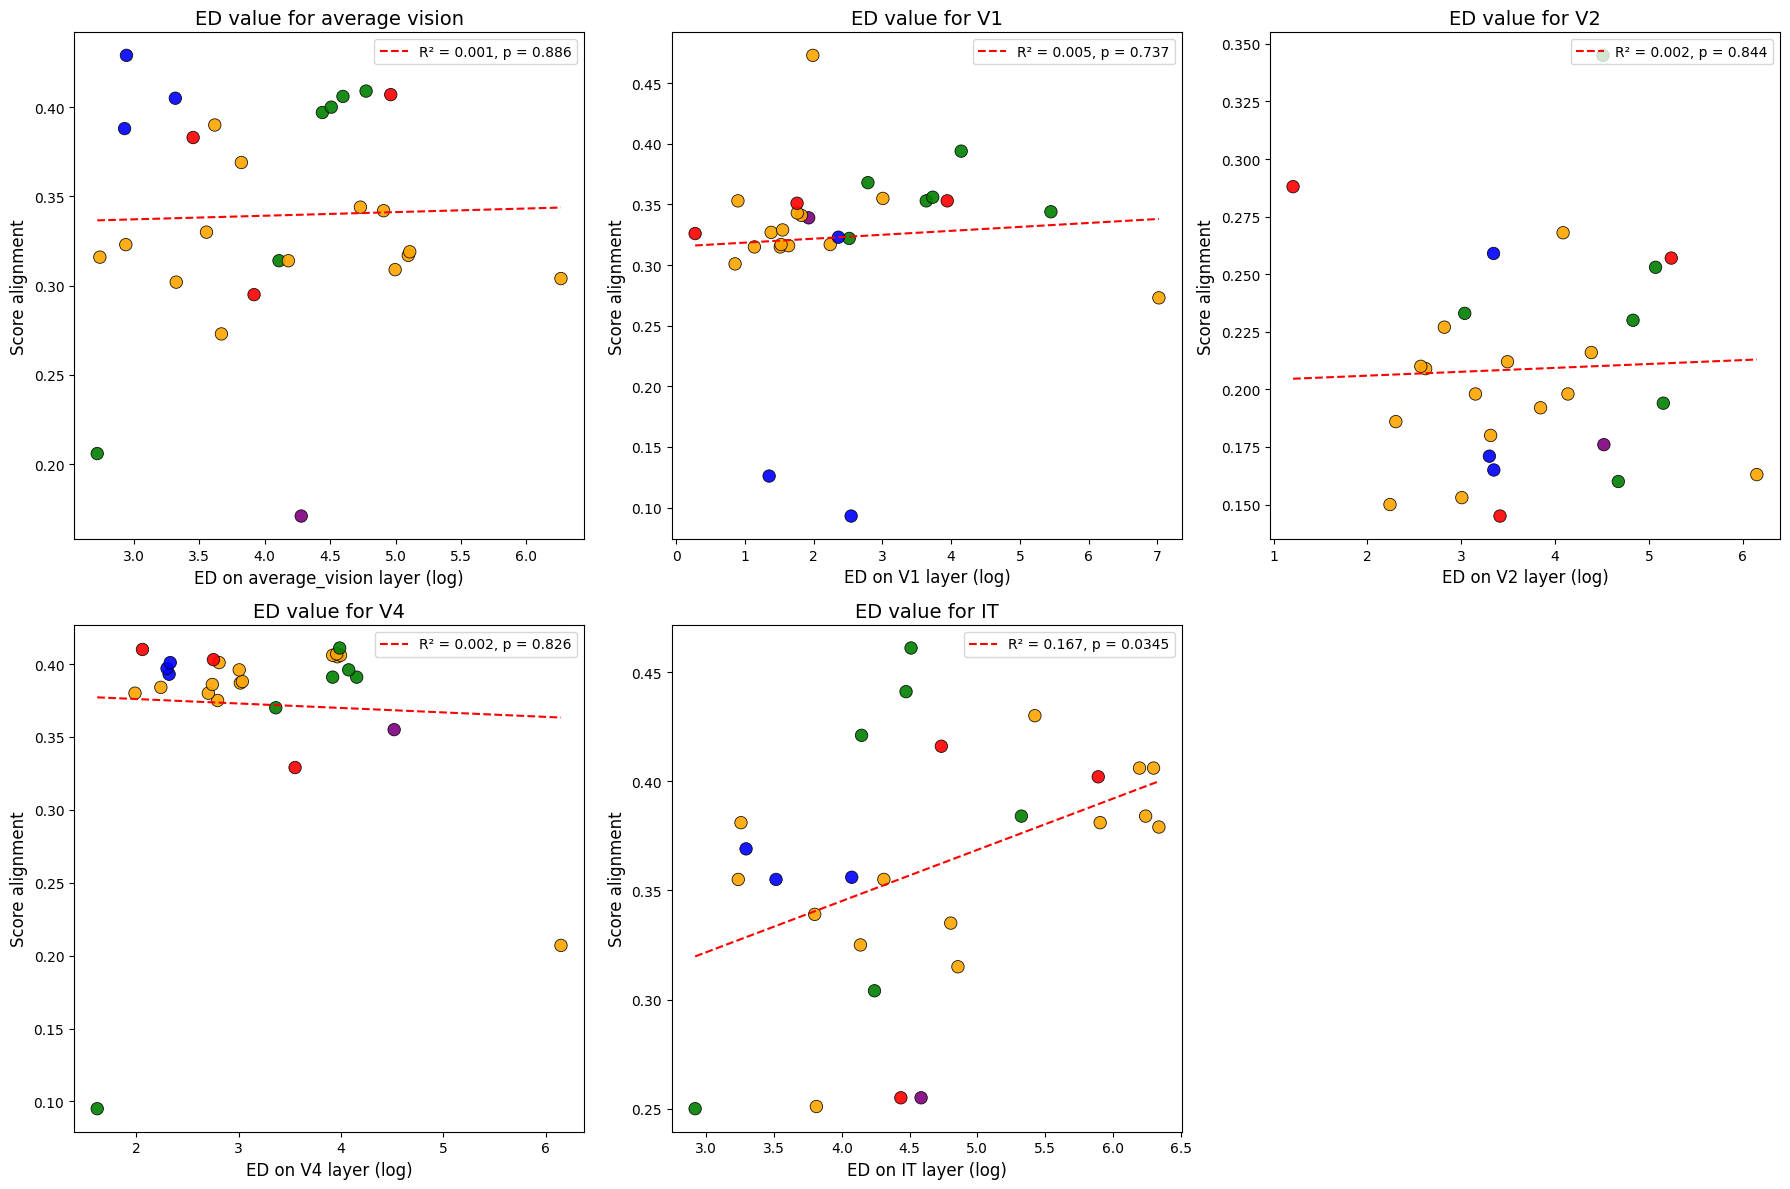

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import pandas as pd

# List of layers and corresponding columns
layers = ['average_vision', 'V1', 'V2', 'V4', 'IT']
ed_columns = ['avg_ED', 'V1_ED', 'V2_ED', 'V4_ED', 'IT_ED']
titles = ['ED value for average vision', 'ED value for V1', 
          'ED value for V2', 'ED value for V4', 'ED value for IT']

# Create a single figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # 2 rows, 3 columns
axes = axes.flatten()  # Flatten the grid of axes for easier iteration

# Loop through each layer to create scatterplots with regression lines
for i, (layer, ed_col, title) in enumerate(zip(layers, ed_columns, titles)):
    # Sort and compute log_ED
    benchmark_ed_sorted = benchmark_ed.copy()
    benchmark_ed_sorted[f'log_{layer}_ED'] = pd.to_numeric(
        np.log(benchmark_ed_sorted[ed_col]), errors='coerce'
    )
    benchmark_ed_sorted[layer] = pd.to_numeric(
        benchmark_ed_sorted[layer], errors='coerce'
    )

    # Drop invalid rows
    valid_data = benchmark_ed_sorted.dropna(subset=[f'log_{layer}_ED', layer])

    # Sort by the y-layer values (increasing order)
    valid_data = valid_data.sort_values(by=layer)
    
    # Extract x and y for regression
    x = valid_data[f'log_{layer}_ED']
    y = valid_data[layer]
    X = sm.add_constant(x)  # Add constant for intercept
    
    # Perform linear regression
    model = sm.OLS(y, X).fit()
    slope, intercept = model.params[1], model.params[0]
    r_squared = model.rsquared
    p_value = model.pvalues[1]
    
    # Generate regression line
    x_line = np.linspace(x.min(), x.max(), 100)
    y_line = slope * x_line + intercept
    
    # Create scatterplot
    sns.scatterplot(
        data=valid_data,
        y=layer,
        x=f'log_{layer}_ED',
        hue='color',
        palette=valid_data['color'].unique(),
        s=80, edgecolor='black', linewidth=0.6, alpha=0.9, legend=False,
        ax=axes[i]
    )
    
    # Add regression line
    axes[i].plot(x_line, y_line, color='red', linestyle='--', 
                 label=f'R² = {r_squared:.3f}, p = {p_value:.3g}')
    
    # Set proper y-axis limits starting from 0
    #axes[i].set_ylim(bottom=0)  # Set the minimum y-axis to 0

    # Add titles and labels
    axes[i].set_title(title, fontsize=14)
    axes[i].set_xlabel(f"ED on {layer} layer (log)", fontsize=12)
    axes[i].set_ylabel("Score alignment", fontsize=12)
    axes[i].legend(loc='upper right')

# Remove the unused subplot (6th one)
fig.delaxes(axes[-1])

# Adjust layout
plt.tight_layout()
plt.show()


/var/folders/dr/39wj8h3n0kd5ffnjl22bj0340000gn/T/ipykernel_46333/703393322.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope, intercept = model.params[1], model.params[0]
/var/folders/dr/39wj8h3n0kd5ffnjl22bj0340000gn/T/ipykernel_46333/703393322.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = model.pvalues[1]
/var/folders/dr/39wj8h3n0kd5ffnjl22bj0340000gn/T/ipykernel_46333/703393322.py:44: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.scatterplot(
/var/folders/dr/39wj8h3n0kd5ffnjl22bj0340000gn/T/i

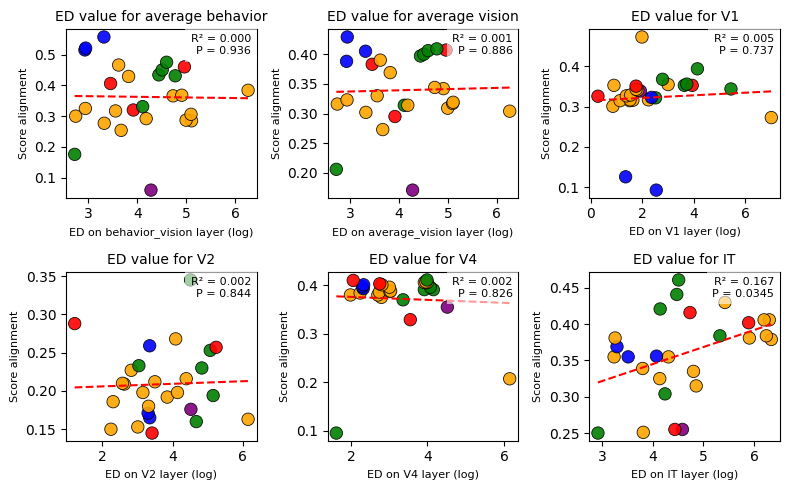

In [23]:


# List of layers and corresponding columns
layers = ['behavior_vision', 'average_vision', 'V1', 'V2', 'V4', 'IT']
ed_columns = ['avg_ED', 'avg_ED', 'V1_ED', 'V2_ED', 'V4_ED', 'IT_ED']
titles = ['ED value for average behavior', 'ED value for average vision', 
          'ED value for V1', 'ED value for V2', 'ED value for V4', 'ED value for IT']

# Create a single figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(8, 5))  # 2 rows, 3 columns
axes = axes.flatten()  # Flatten the grid of axes for easier iteration

# Loop through each layer to create scatterplots with regression lines
for i, (layer, ed_col, title) in enumerate(zip(layers, ed_columns, titles)):
    # Sort and compute log_ED
    benchmark_ed_sorted = benchmark_ed.copy()
    benchmark_ed_sorted[f'log_{layer}_ED'] = pd.to_numeric(
        np.log(benchmark_ed_sorted[ed_col]), errors='coerce'
    )
    benchmark_ed_sorted[layer] = pd.to_numeric(
        benchmark_ed_sorted[layer], errors='coerce'
    )

    # Drop invalid rows
    valid_data = benchmark_ed_sorted.dropna(subset=[f'log_{layer}_ED', layer])

    # Sort by the y-layer values (increasing order)
    valid_data = valid_data.sort_values(by=layer)
    
    # Extract x and y for regression
    x = valid_data[f'log_{layer}_ED']
    y = valid_data[layer]
    X = sm.add_constant(x)  # Add constant for intercept
    
    # Perform linear regression
    model = sm.OLS(y, X).fit()
    slope, intercept = model.params[1], model.params[0]
    r_squared = model.rsquared
    p_value = model.pvalues[1]
    
    # Generate regression line
    x_line = np.linspace(x.min(), x.max(), 100)
    y_line = slope * x_line + intercept
    
    # Create scatterplot
    sns.scatterplot(
        data=valid_data,
        y=layer,
        x=f'log_{layer}_ED',
        hue='color',
        palette=valid_data['color'].unique(),
        s=80, edgecolor='black', linewidth=0.6, alpha=0.9, legend=False,
        ax=axes[i]
    )
    
    # Add regression line
    axes[i].plot(x_line, y_line, color='red', linestyle='--')
    
    # Add R² and p-value as annotations in the top-right
    axes[i].annotate(
        f"R² = {r_squared:.3f}\nP = {p_value:.3g}",
        xy=(0.97, 0.97), xycoords='axes fraction',  # Top-right corner
        fontsize=8, color='black', 
        ha='right', va='top',  # Align text to top-right
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.6)
    )
    
    # Add titles and labels
    axes[i].set_title(title, fontsize=10)
    axes[i].set_xlabel(f"ED on {layer} layer (log)", fontsize=8)
    axes[i].set_ylabel("Score alignment", fontsize=8)

# Adjust layout
plt.tight_layout()
plt.show()


/var/folders/dr/39wj8h3n0kd5ffnjl22bj0340000gn/T/ipykernel_46333/713691085.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Layer', y='Effective Dimensionality', data=melted_data, palette="pastel")


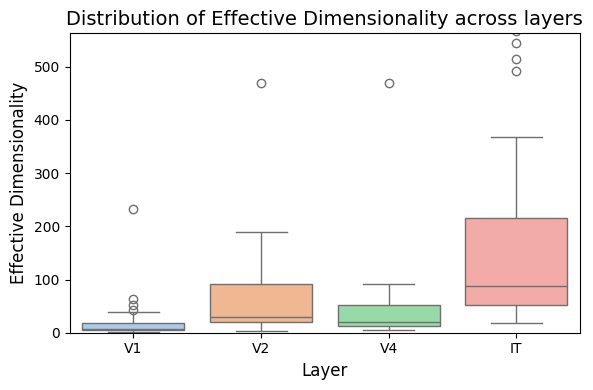

In [24]:
melted_data = benchmark_ed[['V1_ED', 'V2_ED', 'V4_ED', 'IT_ED']].rename(
    columns={'V1_ED': 'V1', 'V2_ED': 'V2', 'V4_ED': 'V4', 'IT_ED': 'IT'}
).melt(var_name="Layer", value_name="Effective Dimensionality")


plt.figure(figsize=(6, 4)) 
sns.boxplot(x='Layer', y='Effective Dimensionality', data=melted_data, palette="pastel")


plt.title("Distribution of Effective Dimensionality across layers", fontsize=14)
plt.xlabel("Layer", fontsize=12)
plt.ylabel("Effective Dimensionality", fontsize=12)

plt.ylim(0, melted_data['Effective Dimensionality'].quantile(0.95) * 1.2)  #To crop extreme outliers
plt.tight_layout()

plt.show()
